# Importing relevant libraries

In [214]:
#dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression, RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb


# Loading data

In [127]:
df = pd.read_csv("./datasets/house-prices-advanced-regression-techniques/train.csv")

In [116]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# Preprocessing

## Dealing with missing values

In [118]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

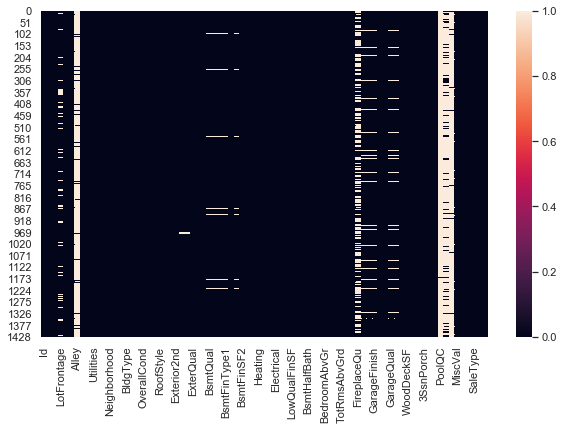

In [119]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

## Categorical variables

In [120]:
cat_var = df.select_dtypes(include='object').columns.values
cat_var

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [121]:
for cat in cat_var:
    print('Number of categories in ',cat, 'is ', len(df[cat].unique()), ': ')
    print(df[cat].value_counts(),'\n')

Number of categories in  MSZoning is  5 : 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Number of categories in  Street is  2 : 
Pave    1454
Grvl       6
Name: Street, dtype: int64 

Number of categories in  Alley is  3 : 
Grvl    50
Pave    41
Name: Alley, dtype: int64 

Number of categories in  LotShape is  4 : 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

Number of categories in  LandContour is  4 : 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

Number of categories in  Utilities is  2 : 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Number of categories in  LotConfig is  5 : 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Number of categories in  LandSlope is  3 : 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

Number of categories in  Neighborhood is

## Imputing Missing Values

In [125]:
df.isnull().sum().sort_values(ascending=False)

BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
ExterCond         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
SalePrice         0
Foundation        0
SaleCondition     0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
RoofStyle         0
YearRemodAdd      0
YearBuilt         0
LandContour       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
                 ..
PoolArea          0
GarageCars        0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
GarageArea        0
GarageFinish      0
Electrical        0
HalfBath          0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0


In [128]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')
    
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(0)

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df[col] = df[col].fillna(0)

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

    
for col in ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    df[col] = df[col].fillna(df[col].mode()[0])

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df.drop(['Utilities'], axis=1, inplace=True)
df["Functional"] = df["Functional"].fillna("Typ")
df['MSSubClass'] = df['MSSubClass'].fillna("None")

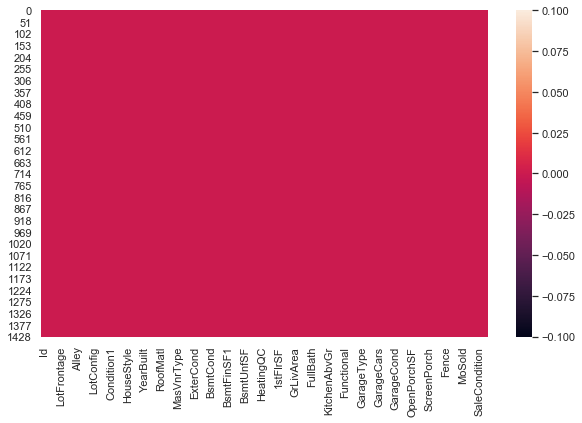

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [130]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [131]:
df_no_mv = df.copy()

## Label encoding

In [176]:
cat_var_ordinal = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cat_var_ordinal:
    lbl = LabelEncoder() 
    lbl.fit(list(df_no_mv[c].values)) 
    df_no_mv[c] = lbl.transform(list(df_no_mv[c].values))

In [142]:
df_no_mv['TotalSF'] = df_no_mv['TotalBsmtSF'] + df_no_mv['1stFlrSF'] + df_no_mv['2ndFlrSF']

In [143]:
df_no_mv = pd.get_dummies(df_no_mv)

# Exploring the PDFs

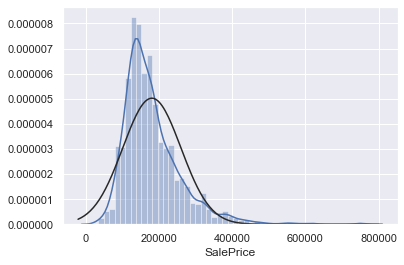

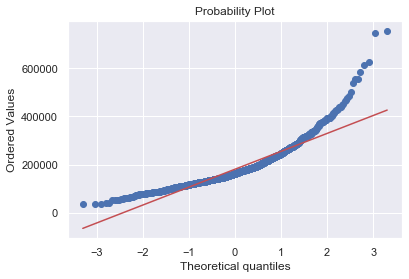

In [144]:
sns.distplot(df_no_mv['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_no_mv['SalePrice'], plot=plt)

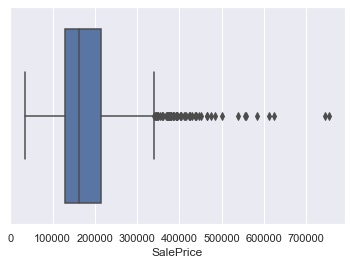

In [145]:
sns.boxplot(x=df_no_mv['SalePrice'])

## Dealing with outliers

In [146]:
df_no_mv['Log_SalePrice'] = np.log(df_no_mv['SalePrice'])

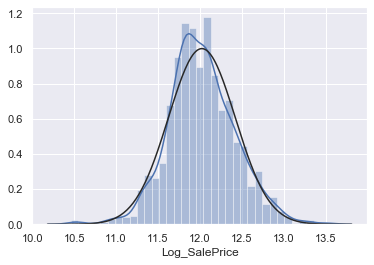

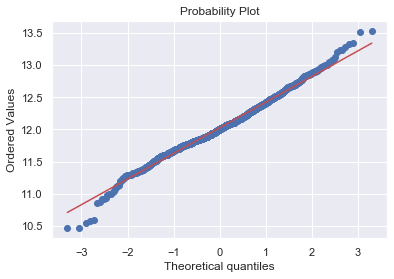

In [76]:
sns.distplot(df_no_mv['Log_SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_no_mv['Log_SalePrice'], plot=plt)

## Features

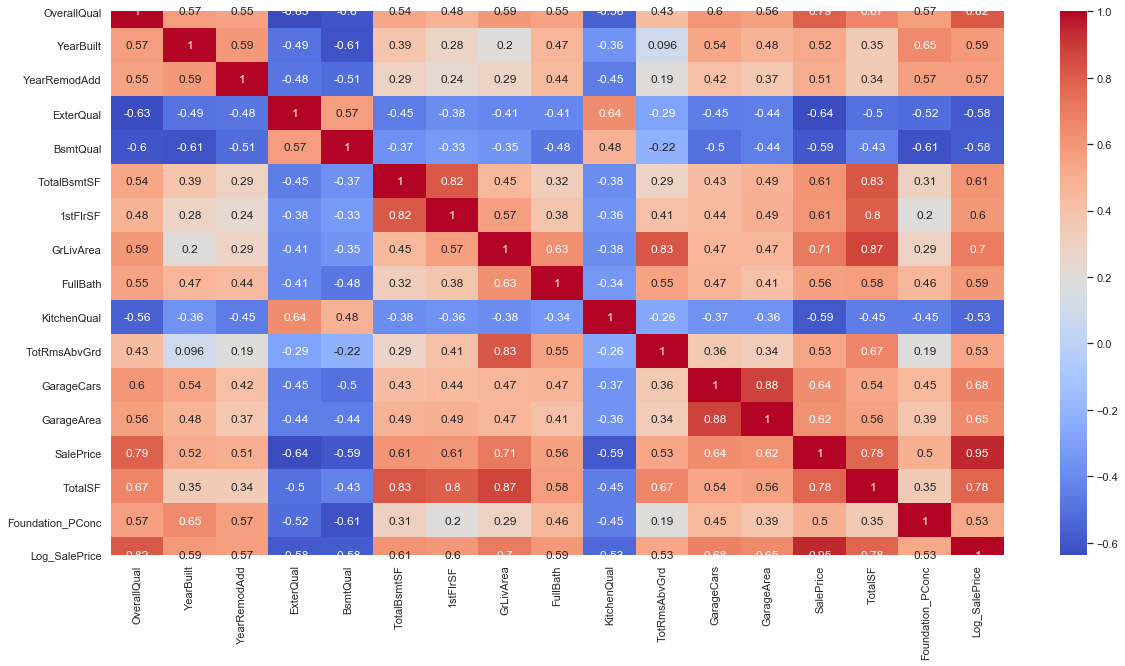

In [148]:
corr_matrix = df_no_mv.corr()
price_corr = df_no_mv.corr()['Log_SalePrice']
top_corr_features = price_corr[np.absolute(price_corr) > 0.5].index
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix.loc[top_corr_features,top_corr_features], cmap= 'coolwarm', annot=True)

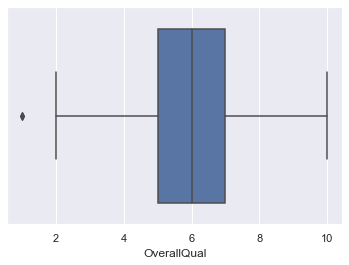

In [149]:
sns.boxplot(df_no_mv['OverallQual'])

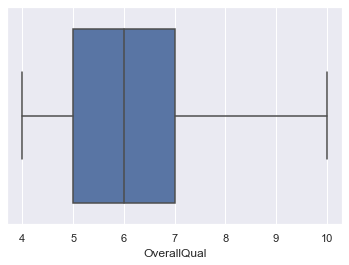

In [150]:
q = df_no_mv['OverallQual'].quantile(0.01)
df_no_mv = df_no_mv[df_no_mv['OverallQual']>q]
sns.boxplot(df_no_mv['OverallQual'])

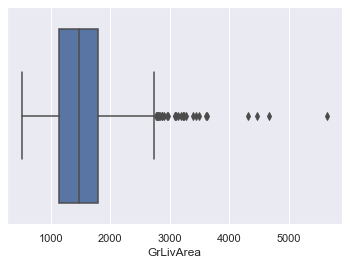

In [151]:
sns.boxplot(df_no_mv['GrLivArea'])

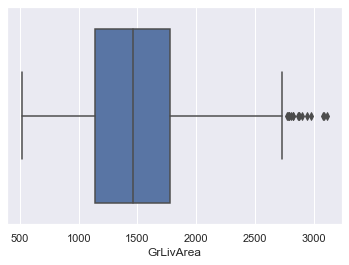

In [152]:
q = df_no_mv['GrLivArea'].quantile(0.99)
df_no_mv = df_no_mv[df_no_mv['GrLivArea']<q]
sns.boxplot(df_no_mv['GrLivArea'])

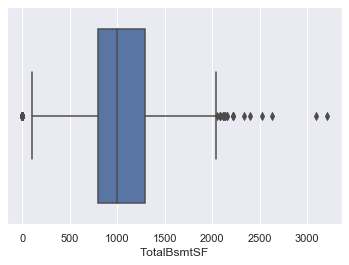

In [153]:
sns.boxplot(df_no_mv['TotalBsmtSF'])

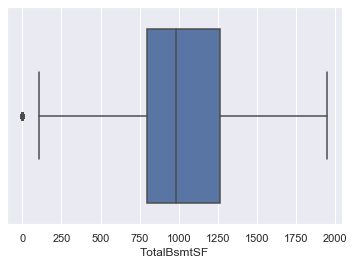

In [155]:
q = df_no_mv['TotalBsmtSF'].quantile(0.99)
df_no_mv = df_no_mv[df_no_mv['TotalBsmtSF']<q]
sns.boxplot(df_no_mv['TotalBsmtSF'])

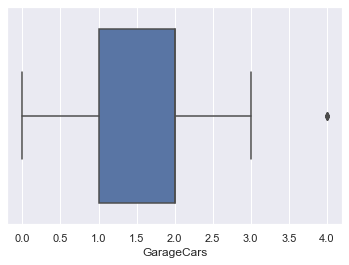

In [156]:
sns.boxplot(df_no_mv['GarageCars'])

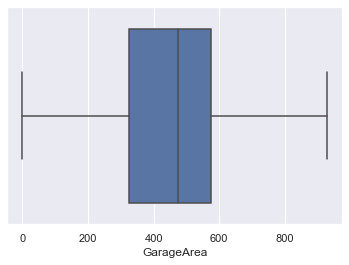

In [157]:
q = df_no_mv['GarageArea'].quantile(0.99)
df_no_mv = df_no_mv[df_no_mv['GarageArea']<q]
sns.boxplot(df_no_mv['GarageArea'])

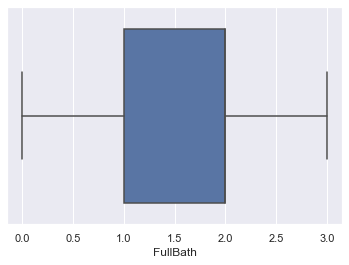

In [158]:
sns.boxplot(df_no_mv['FullBath'])

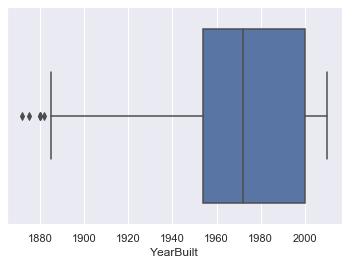

In [159]:
sns.boxplot(df_no_mv['YearBuilt'])

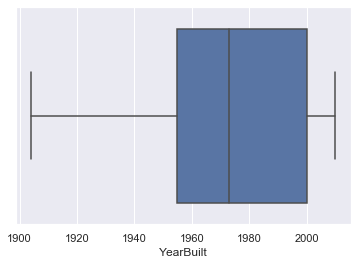

In [160]:
q = df_no_mv['YearBuilt'].quantile(0.01)
df_no_mv = df_no_mv[df_no_mv['YearBuilt']>q]
sns.boxplot(df_no_mv['YearBuilt'])

In [161]:
data_cleaned = df_no_mv.reset_index(drop=True)

# Checking the OLS assumptions

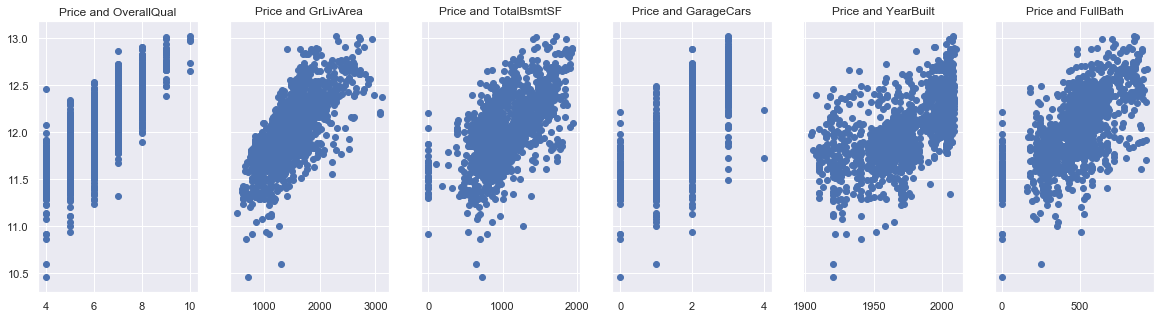

In [162]:
# OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize =(20,5)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['OverallQual'],data_cleaned['Log_SalePrice'])
ax1.set_title('Price and OverallQual')
ax2.scatter(data_cleaned['GrLivArea'],data_cleaned['Log_SalePrice'])
ax2.set_title('Price and GrLivArea')
ax3.scatter(data_cleaned['TotalBsmtSF'],data_cleaned['Log_SalePrice'])
ax3.set_title('Price and TotalBsmtSF')
ax4.scatter(data_cleaned['GarageCars'],data_cleaned['Log_SalePrice'])
ax4.set_title('Price and GarageCars')
ax5.scatter(data_cleaned['YearBuilt'],data_cleaned['Log_SalePrice'])
ax5.set_title('Price and YearBuilt')
ax6.scatter(data_cleaned['GarageArea'],data_cleaned['Log_SalePrice'])
ax6.set_title('Price and FullBath')

plt.show()

In [212]:
features = data_cleaned.drop(['Log_SalePrice', 'SalePrice'], axis=1)
targets = data_cleaned['Log_SalePrice']

## Scale data

In [215]:
scaler = MinMaxScaler()
scaler.fit(features)

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

## Split train test

In [216]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=365)

## Regression

### LinearRegression

In [217]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train), mse(y_test, reg.predict(x_test))**0.5)

0.9414427786456293 0.111591982373107


### RidgeCV

In [218]:
reg = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
reg.fit(x_train,y_train)
alpha = reg.alpha_
reg = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
reg.fit(x_train,y_train)
alpha = reg.alpha_
reg = RidgeCV(alphas=[alpha])
reg.fit(x_train,y_train)
mse(y_test, reg.predict(x_test))**0.5

0.10365608404121718

 ### DecisionTree Regressor

In [219]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    error = mse(val_y, preds_val)
    return error

for max_leaf_nodes in [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: ",max_leaf_nodes,"\t Mean Absolute Error: " , my_mae**0.5)

Max leaf nodes:  70 	 Mean Absolute Error:  0.1730477226002168
Max leaf nodes:  80 	 Mean Absolute Error:  0.17184162193572222
Max leaf nodes:  90 	 Mean Absolute Error:  0.17418580518975083
Max leaf nodes:  100 	 Mean Absolute Error:  0.17298617464950655
Max leaf nodes:  110 	 Mean Absolute Error:  0.17471647348234443
Max leaf nodes:  120 	 Mean Absolute Error:  0.17470675160447147
Max leaf nodes:  130 	 Mean Absolute Error:  0.17440135191251901
Max leaf nodes:  140 	 Mean Absolute Error:  0.1769302277983966
Max leaf nodes:  150 	 Mean Absolute Error:  0.17817000193376176
Max leaf nodes:  160 	 Mean Absolute Error:  0.1785178186712268
Max leaf nodes:  170 	 Mean Absolute Error:  0.17905040802096658


In [220]:
def get_mae(alpha,train_X, val_X, train_y, val_y):
    model = LassoCV(alphas=[alpha],normalize=True, max_iter=1e5)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    error = mse(val_y, preds_val)
    return error

np.sqrt(get_mae(.0005, x_train, x_test, y_train, y_test))

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.11524045455457656

In [179]:
y_hat = reg.predict(x_train)

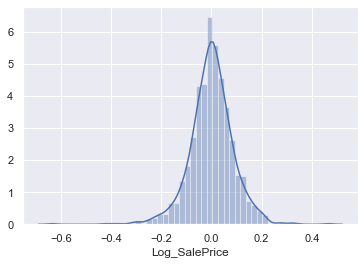

In [180]:
sns.distplot(y_train - y_hat)

In [181]:
y_hat_test = reg.predict(x_test)

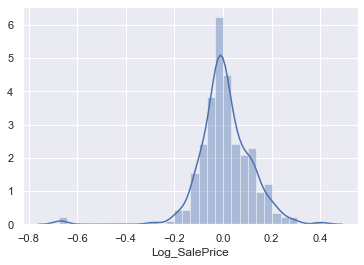

In [182]:
sns.distplot(y_test - y_hat_test)


In [183]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,153661.252778
1,183326.471058
2,143001.378253
3,226118.110792
4,245226.240411


In [184]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'])
df_pf.head()

,Prediction,Target,Residual,Difference%
0,153661.252778,167500.0,13838.747222,0.082619
1,183326.471058,169990.0,-13336.471058,0.078454
2,143001.378253,141000.0,-2001.378253,0.014194
3,226118.110792,190000.0,-36118.110792,0.190095
4,245226.240411,275000.0,29773.759589,0.108268


In [185]:
reg.coef_

array([ 1.66659888e-06, -1.49951023e-03,  7.13765526e-04,  1.98958743e-06,
        9.74949796e-02,  3.62552603e-03,  6.61302802e-04,  8.66166716e-03,
        4.60565778e-02,  4.00325188e-02,  1.73687112e-03,  5.42208964e-04,
        1.12020041e-05, -3.56019803e-03,  8.69646651e-03, -5.58294094e-03,
        5.38875284e-03, -6.15846564e-03,  1.06095963e-03,  4.41460185e-05,
       -1.31448698e-03,  8.23773840e-06, -4.45180194e-05,  7.86574446e-06,
       -5.73179644e-03,  4.58519638e-02,  5.24388877e-05,  5.19231226e-05,
        1.05217821e-05,  1.14883594e-04,  2.78951320e-02,  2.14067442e-02,
        1.95313436e-02,  1.43742798e-02, -2.16537448e-03, -3.77954243e-02,
       -6.26132584e-03,  3.68234658e-03,  1.59564372e-02,  1.59981490e-02,
       -3.41715666e-03,  1.44369879e-04, -8.09129603e-04,  1.75266614e-02,
        9.13304202e-05,  9.23315885e-03,  5.55064144e-05,  2.27091796e-02,
        8.52827514e-05,  1.06120268e-04,  1.28429289e-04,  2.28033955e-04,
        2.22396906e-04,  

In [186]:
reg.intercept_

4.957999217573384

In [194]:
reg.score(x_train,y_train)

0.9329671255546268

In [195]:
mse(y_test, y_hat_test)

0.012452770529959821

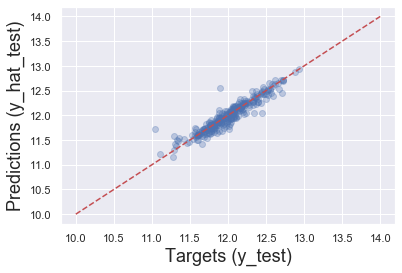

In [191]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.plot([10.,14.], [10.,14.], '--', c='r')
plt.show()

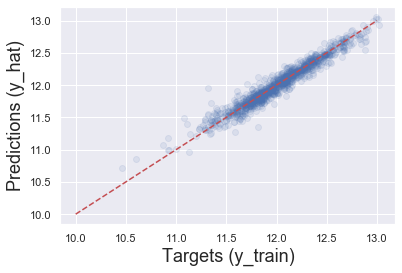

In [192]:
plt.scatter(y_train, y_hat, alpha=0.1)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.plot([10.,13.], [10.,13.], '--', c='r')
plt.show()